In [ ]:
import torch
print("Gpu avilable",torch.cuda.is_available())
print("GPU name",torch.cuda.get_device_name(0))

Gpu avilable True
GPU name Tesla T4


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/smartphone_classification"

print("Folders in dataset:", os.listdir(dataset_path))  # Should show ['Fake', 'Original']

Folders in dataset: ['fake', 'original']


In [ ]:
import os

# Define the paths for the fake and original image folders
fake_path = os.path.join(dataset_path, "fake")
original_path = os.path.join(dataset_path, "original")

# Count the number of images in each folder
num_fake = len(os.listdir(fake_path))
num_original = len(os.listdir(original_path))

# Print the count of images in each category
print(f"Fake images: {num_fake}")
print(f"Original images: {num_original}")


Fake images: 45
Original images: 45


In [ ]:
import cv2
# checking for corrupt or unreadable images

def check_corrupt_images(folder_path):
    corrupt_files = []
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is None:
            corrupt_files.append(file)
    return corrupt_files

fake_corrupt = check_corrupt_images(fake_path)
original_corrupt = check_corrupt_images(original_path)

print("Corrupt Fake Images:", fake_corrupt)
print("Corrupt Original Images:", original_corrupt)


Corrupt Fake Images: []
Corrupt Original Images: []


In [ ]:
!pip install imgaug

In [ ]:
import os
import cv2
import numpy as np
import random
import imgaug.augmenters as iaa
from google.colab import files
from tqdm import tqdm  # Progress bar for augmentation


In [ ]:
# dataset's actual paths
fake_path = "/content/drive/MyDrive/smartphone_classification/fake"
original_path = "/content/drive/MyDrive/smartphone_classification/original"

# Paths to save augmented images
augmented_fake_path = "/content/drive/MyDrive/smartphone_classification/Augmented_Fake"
augmented_original_path = "/content/drive/MyDrive/smartphone_classification/Augmented_Original"

# Run augmentation
augment_images(fake_path, augmented_fake_path, num_augmented=10)
augment_images(original_path, augmented_original_path, num_augmented=10)



def augment_images(input_folder, output_folder, num_augmented=10):
    """
    Applies augmentation to images in the input_folder and saves them to output_folder.

    - num_augmented: How many augmented versions per image.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define augmentations
    seq = iaa.Sequential([
        iaa.Affine(rotate=(-15, 15)),  # Rotate randomly between -15° to 15°
        iaa.Fliplr(0.5),  # Flip 50% of images horizontally
        iaa.Multiply((0.8, 1.2)),  # Adjust brightness randomly (80% to 120%)
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add slight Gaussian noise
    ])

    # Process each image
    for img_name in tqdm(os.listdir(input_folder), desc=f"Augmenting {input_folder}"):
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"⚠ Warning: Unable to read {img_name}. Skipping...")
            continue  # Skip this image

        for i in range(num_augmented):
            # Apply augmentation
            augmented_img = seq.augment_image(img)

            # Save augmented image
            new_filename = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
            new_filepath = os.path.join(output_folder, new_filename)
            cv2.imwrite(new_filepath, augmented_img)

        print(f"✅ Processed {img_name}")

    print(f"\n🎉 Augmentation complete! Augmented images saved in: {output_folder}")



Augmenting /content/drive/MyDrive/smartphone_classification/fake:   2%|▏         | 1/45 [00:00<00:12,  3.57it/s]

✅ Processed Galaxy_S20plus.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:   7%|▋         | 3/45 [00:01<00:19,  2.11it/s]

✅ Processed galaxya50internal.png
✅ Processed galaxya54internal.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:   9%|▉         | 4/45 [00:02<00:20,  2.03it/s]

✅ Processed galaxyf54internal.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  13%|█▎        | 6/45 [00:02<00:12,  3.15it/s]

✅ Processed GalaxyS21Ultra.png
✅ Processed note9internal.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  16%|█▌        | 7/45 [00:02<00:11,  3.28it/s]

✅ Processed note10+internal.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  18%|█▊        | 8/45 [00:02<00:10,  3.61it/s]

✅ Processed original iphone 3gs non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  20%|██        | 9/45 [00:03<00:09,  3.61it/s]

✅ Processed original iphone 5 non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  22%|██▏       | 10/45 [00:03<00:09,  3.62it/s]

✅ Processed original iphone 5c non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  24%|██▍       | 11/45 [00:03<00:09,  3.70it/s]

✅ Processed original iphone 5s non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  27%|██▋       | 12/45 [00:04<00:09,  3.56it/s]

✅ Processed original iphone 6 non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  31%|███       | 14/45 [00:04<00:07,  3.91it/s]

✅ Processed original iphone 6 plus non xray.png
✅ Processed original iphone 6s non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  33%|███▎      | 15/45 [00:04<00:06,  4.38it/s]

✅ Processed original iphone 6s plus non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  36%|███▌      | 16/45 [00:04<00:06,  4.21it/s]

✅ Processed original iphone 7 non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  40%|████      | 18/45 [00:05<00:05,  4.51it/s]

✅ Processed original iphone 7 plus non xray.png
✅ Processed original iphone 8 non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  42%|████▏     | 19/45 [00:05<00:05,  4.72it/s]

✅ Processed original iphone 8 plus non xray .png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  44%|████▍     | 20/45 [00:05<00:05,  4.56it/s]

✅ Processed original iphone 10 non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  47%|████▋     | 21/45 [00:07<00:14,  1.65it/s]

✅ Processed original iphone 14 pro max non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  49%|████▉     | 22/45 [00:07<00:11,  2.06it/s]

✅ Processed original iphone xr non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  51%|█████     | 23/45 [00:07<00:08,  2.50it/s]

✅ Processed original iphone xs max non xray.png
✅ Processed original iphone xs non xray.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  56%|█████▌    | 25/45 [00:08<00:06,  3.26it/s]

✅ Processed s20internal.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  58%|█████▊    | 26/45 [00:08<00:05,  3.55it/s]

✅ Processed s20ultra.png


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  60%|██████    | 27/45 [00:08<00:05,  3.01it/s]

✅ Processed s24ultraxrayfromreddit.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  62%|██████▏   | 28/45 [00:10<00:11,  1.49it/s]

✅ Processed s23-Ultra-x-ray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  64%|██████▍   | 29/45 [00:10<00:08,  1.85it/s]

✅ Processed s20xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  69%|██████▉   | 31/45 [00:11<00:05,  2.57it/s]

✅ Processed s20ultraxray.jpg
✅ Processed s20plusxray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  73%|███████▎  | 33/45 [00:11<00:03,  3.45it/s]

✅ Processed original samsumng galaxy s21 xray.jpg
✅ Processed original iphone xs xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  78%|███████▊  | 35/45 [00:11<00:02,  4.24it/s]

✅ Processed original iphone xs max xray.jpg
✅ Processed original iphone xr xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  80%|████████  | 36/45 [00:12<00:02,  3.95it/s]

✅ Processed original iphone 16 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  82%|████████▏ | 37/45 [00:12<00:02,  3.84it/s]

✅ Processed original iphone 15 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  84%|████████▍ | 38/45 [00:13<00:04,  1.69it/s]

✅ Processed original iphone 14 pro max  xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  89%|████████▉ | 40/45 [00:14<00:01,  2.55it/s]

✅ Processed original iphone 10 xray.jpg
✅ Processed original iphone 8 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  91%|█████████ | 41/45 [00:14<00:01,  3.02it/s]

✅ Processed original iphone 8 plus xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  93%|█████████▎| 42/45 [00:14<00:00,  3.38it/s]

✅ Processed original iphone 4s xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake:  98%|█████████▊| 44/45 [00:14<00:00,  4.44it/s]

✅ Processed note10+xray.jpg
✅ Processed note9xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/fake: 100%|██████████| 45/45 [00:15<00:00,  2.99it/s]


✅ Processed GalaxyS21Ultraxray.jpg

🎉 Augmentation complete! Augmented images saved in: /content/drive/MyDrive/smartphone_classification/Augmented_Fake


Augmenting /content/drive/MyDrive/smartphone_classification/original:   2%|▏         | 1/45 [00:02<01:55,  2.62s/it]

✅ Processed original iphone 14 pro max non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:   7%|▋         | 3/45 [00:04<00:49,  1.17s/it]

✅ Processed original iphone 14 pro max  xray.jpg
✅ Processed galaxya54internal.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:   9%|▉         | 4/45 [00:04<00:32,  1.26it/s]

✅ Processed GalaxyS21Ultra.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  11%|█         | 5/45 [00:04<00:23,  1.70it/s]

✅ Processed Galaxy_S20plus.jpg
✅ Processed GalaxyS21Ultraxray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  16%|█▌        | 7/45 [00:05<00:23,  1.62it/s]

✅ Processed galaxya50internal.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  18%|█▊        | 8/45 [00:06<00:23,  1.59it/s]

✅ Processed galaxyf54internal.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  20%|██        | 9/45 [00:06<00:18,  1.91it/s]

✅ Processed note10+xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  24%|██▍       | 11/45 [00:07<00:11,  2.96it/s]

✅ Processed s20ultraxray.jpg
✅ Processed note9xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  27%|██▋       | 12/45 [00:07<00:09,  3.31it/s]

✅ Processed note10+internal.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  29%|██▉       | 13/45 [00:07<00:08,  3.67it/s]

✅ Processed s20plusxray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  33%|███▎      | 15/45 [00:08<00:06,  4.41it/s]

✅ Processed s20ultra.jpg
✅ Processed note9internal.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  36%|███▌      | 16/45 [00:08<00:09,  3.06it/s]

✅ Processed s24ultraxrayfromreddit.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  38%|███▊      | 17/45 [00:08<00:08,  3.34it/s]

✅ Processed s20xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  40%|████      | 18/45 [00:10<00:16,  1.60it/s]

✅ Processed s23-Ultra-x-ray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  44%|████▍     | 20/45 [00:10<00:09,  2.51it/s]

✅ Processed s20internal.jpg
✅ Processed original iphone 6s plus non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  49%|████▉     | 22/45 [00:11<00:06,  3.45it/s]

✅ Processed original iphone xs non xray.jpg
✅ Processed original iphone xr non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  53%|█████▎    | 24/45 [00:11<00:04,  4.27it/s]

✅ Processed original iphone 7 non xray.jpg
✅ Processed original iphone 8 plus non xray .jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  58%|█████▊    | 26/45 [00:11<00:04,  4.60it/s]

✅ Processed original iphone 5c non xray.jpg
✅ Processed original iphone 8 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  60%|██████    | 27/45 [00:12<00:03,  4.60it/s]

✅ Processed original iphone 6 plus non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  62%|██████▏   | 28/45 [00:12<00:03,  4.63it/s]

✅ Processed original iphone 10 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  64%|██████▍   | 29/45 [00:12<00:03,  4.36it/s]

✅ Processed original iphone 4s xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  69%|██████▉   | 31/45 [00:12<00:03,  4.41it/s]

✅ Processed original iphone 16 xray.jpg
✅ Processed original iphone xr xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  73%|███████▎  | 33/45 [00:13<00:02,  4.78it/s]

✅ Processed original iphone 7 plus non xray.jpg
✅ Processed original iphone xs xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  76%|███████▌  | 34/45 [00:13<00:03,  3.50it/s]

✅ Processed original iphone xs max xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  78%|███████▊  | 35/45 [00:14<00:02,  3.80it/s]

✅ Processed original iphone 3gs non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  80%|████████  | 36/45 [00:14<00:02,  3.66it/s]

✅ Processed original iphone 10 non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  82%|████████▏ | 37/45 [00:14<00:02,  3.72it/s]

✅ Processed original iphone 8 non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  87%|████████▋ | 39/45 [00:15<00:01,  3.56it/s]

✅ Processed original iphone 15 xray.jpg
✅ Processed original iphone 6s non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  89%|████████▉ | 40/45 [00:15<00:01,  3.85it/s]

✅ Processed original iphone xs max non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  91%|█████████ | 41/45 [00:15<00:00,  4.04it/s]

✅ Processed original samsumng galaxy s21 xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  93%|█████████▎| 42/45 [00:15<00:00,  4.20it/s]

✅ Processed original iphone 8 plus xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  96%|█████████▌| 43/45 [00:16<00:00,  4.19it/s]

✅ Processed original iphone 6 non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original:  98%|█████████▊| 44/45 [00:16<00:00,  4.08it/s]

✅ Processed original iphone 5 non xray.jpg


Augmenting /content/drive/MyDrive/smartphone_classification/original: 100%|██████████| 45/45 [00:16<00:00,  2.70it/s]

✅ Processed original iphone 5s non xray.jpg

🎉 Augmentation complete! Augmented images saved in: /content/drive/MyDrive/smartphone_classification/Augmented_Original


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from PIL import Image
import os

# Define a single transformation (Convert all images to RGB)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize for 3 channels
])

# Custom Dataset to ensure all images are converted to RGB
class UnifiedDataset(ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        image = Image.open(path).convert("RGB")  # Convert all images to RGB (3 channels)
        image = transform(image)
        return image, label

# Define dataset path
dataset_path = "/content/drive/MyDrive/smartphone_classification"

# Load dataset with automatic RGB conversion
dataset = UnifiedDataset(root=dataset_path)

# Split dataset into 80% training, 20% testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Check dataset info
print(f"Total Images: {len(dataset)}")
print(f"Training Images: {len(train_dataset)}, Testing Images: {len(test_dataset)}")
print(f"Classes: {dataset.classes}")  # Should print ['fake', 'original']


Total Images: 412
Training Images: 329, Testing Images: 83
Classes: ['fake', 'original']


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define Updated CNN Architecture
class SmartphoneCNN(nn.Module):
    def __init__(self):
        super(SmartphoneCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Fix: 3 channels for RGB
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 64 * 32 * 32)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Output (No Softmax because CrossEntropyLoss applies it)
        return x

# Instantiate model
model = SmartphoneCNN()
print(model)


SmartphoneCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
import torch.optim as optim
import torch

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # You can increase this if needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("✅ Training complete!")


Epoch 1/10, Loss: 0.4903
Epoch 2/10, Loss: 0.2033
Epoch 3/10, Loss: 0.1731
Epoch 4/10, Loss: 0.1269
Epoch 5/10, Loss: 0.0991
Epoch 6/10, Loss: 0.0785
Epoch 7/10, Loss: 0.0856
Epoch 8/10, Loss: 0.0652
Epoch 9/10, Loss: 0.0640
Epoch 10/10, Loss: 0.0409
✅ Training complete!


In [ ]:
# Set model to evaluation mode
model.eval()

# Track accuracy
correct = 0
total = 0

with torch.no_grad():  # No gradient calculation for testing (faster)
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Get predictions
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"✅ Model Accuracy on Test Data: {accuracy:.2f}%")


✅ Model Accuracy on Test Data: 93.98%


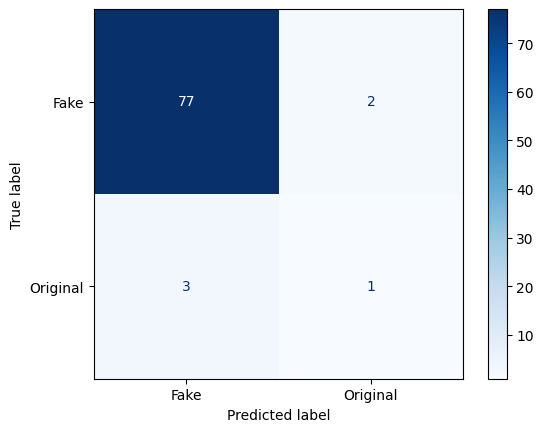

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Get predictions
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Display Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['Fake', 'Original'])
disp.plot(cmap="Blues")  # Uses Matplotlib for visualization


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=['Fake', 'Original']))


Classification Report:

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.97        79
    Original       0.33      0.25      0.29         4

    accuracy                           0.94        83
   macro avg       0.65      0.61      0.63        83
weighted avg       0.93      0.94      0.94        83



In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/smartphone_model.pth")  # ✅ Saves only the weights



In [ ]:
#ALL the training and saving the model has been done
# Below we are loading the the weights and rewritting the architecture for deployment purpose.
# Everytime we reconnect we need to load the weights and rewrite the architecture of model.

In [ ]:
!python --version  # Check Python version
!pip show torch torchvision streamlit pillow

Python 3.11.11
Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
---
Name: torchvision
Version: 0.20.1+cu124
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
R